In [1]:
from scipy.io import wavfile
fs, data = wavfile.read('./train/Applause_03320f05.wav')



In [36]:
import os
arr = os.listdir('./train/')

In [41]:
import re

cat_ids = set()
files_by_cat = {}
for filename in arr:
    category = re.match('[^_]*', filename)[0]
    cat_ids.add(category)
    if not files_by_cat.get(category):
        files_by_cat[category] = []
    files_by_cat[category].append(filename)
    
print(cat_ids)
print(files_by_cat['Applause'][0])
for key in files_by_cat.keys():
    print(key, len(files_by_cat[key]))

{'Cough', 'Fart', 'Tearing', 'Saxophone', 'Applause', 'Trumpet', 'Fireworks', 'Double', 'Squeak', 'Burping'}
Applause_03320f05.wav
Applause 273
Burping 187
Cough 222
Double 281
Fart 274
Fireworks 275
Saxophone 271
Squeak 272
Tearing 273
Trumpet 275


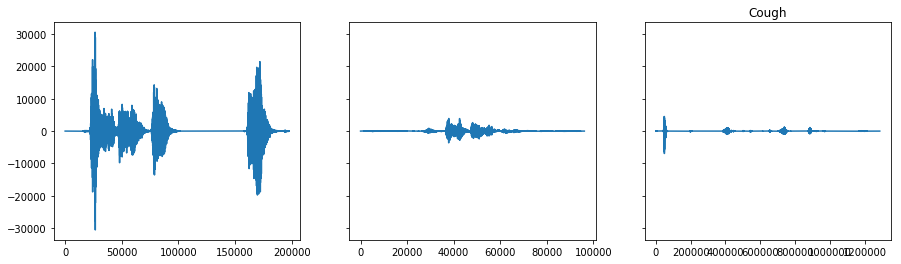

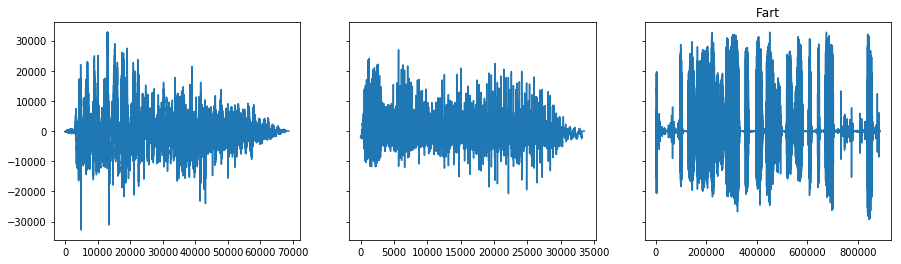

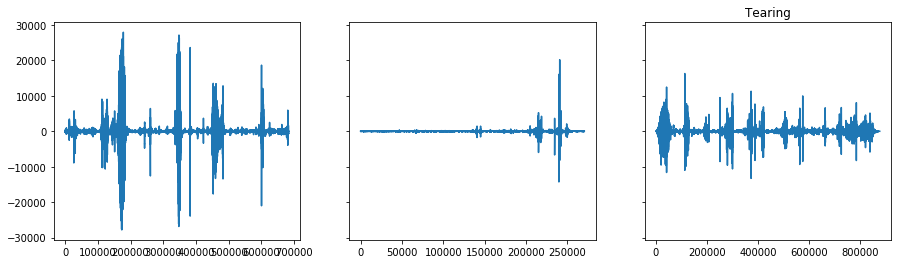

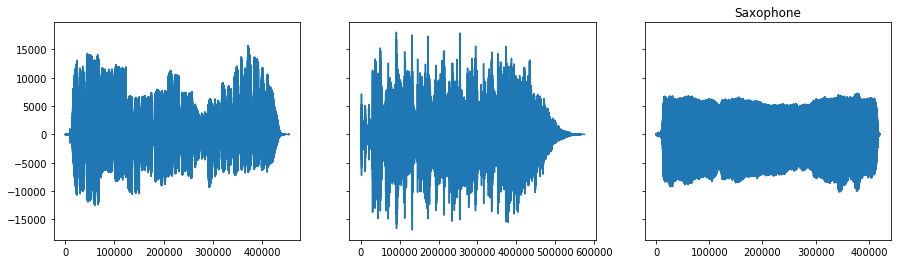

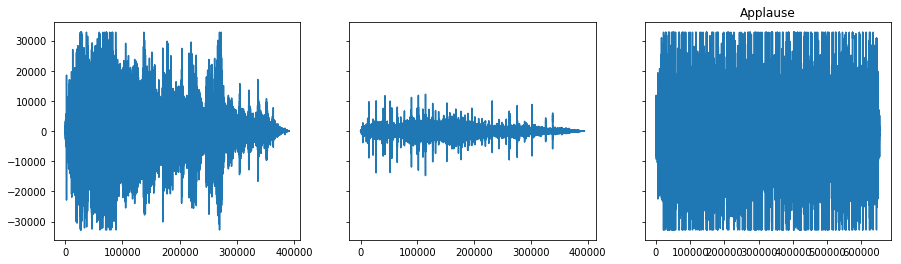

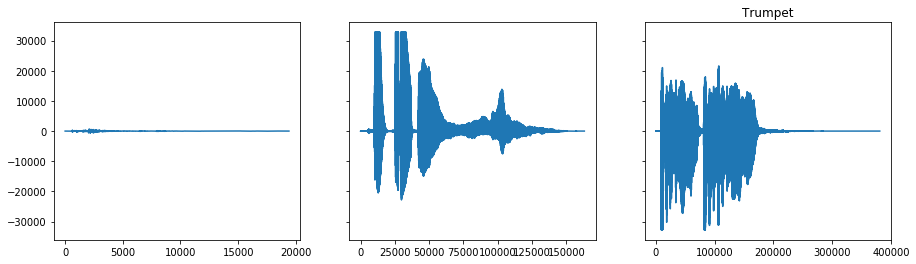

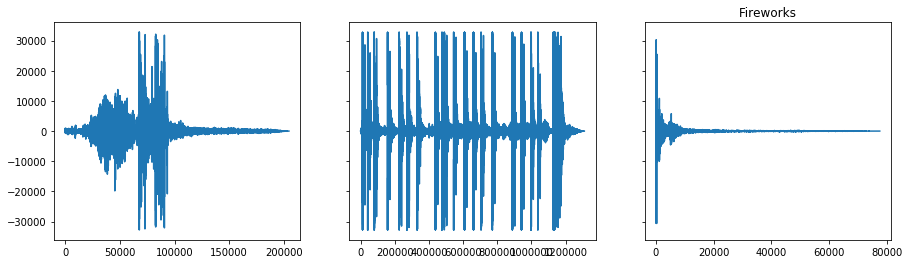

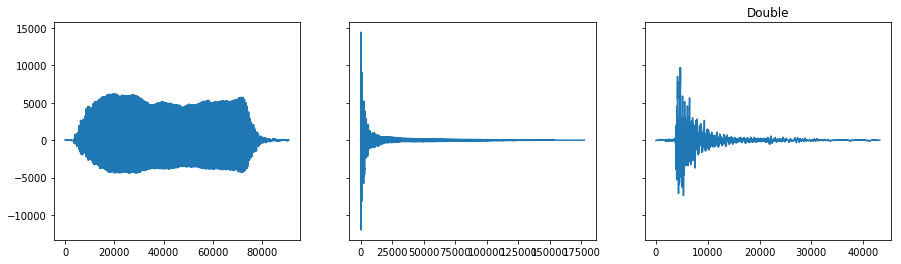

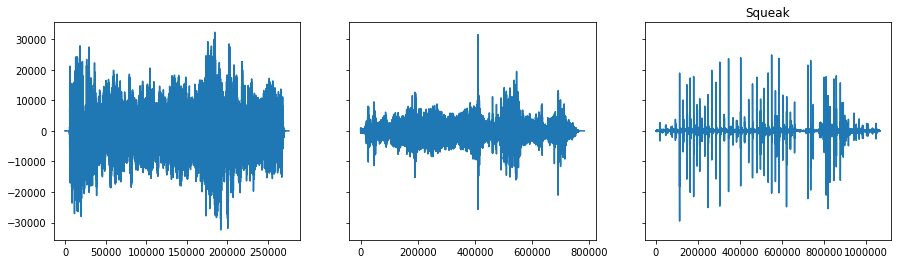

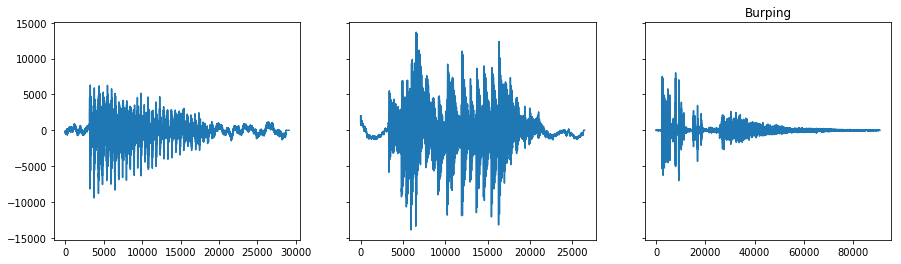

In [75]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15.0, 4.0] 

def identity(data, fs):
    return data;

def plot_cat_data(plt, cat_id, filename, fn=identity):
    fs, data = wavfile.read(filename)
    plt.plot(fn(data, fs))

for cat_id in cat_ids:
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
    plot_cat_data(ax1, cat_id, './train/' + files_by_cat[cat_id][0])
    plot_cat_data(ax2, cat_id, './train/' + files_by_cat[cat_id][1])
    plot_cat_data(ax3, cat_id, './train/' + files_by_cat[cat_id][2])
    plt.title(cat_id)
    plt.show()



In [68]:
print(plt.rcParams['figure.figsize'])

[6.0, 4.0]


/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


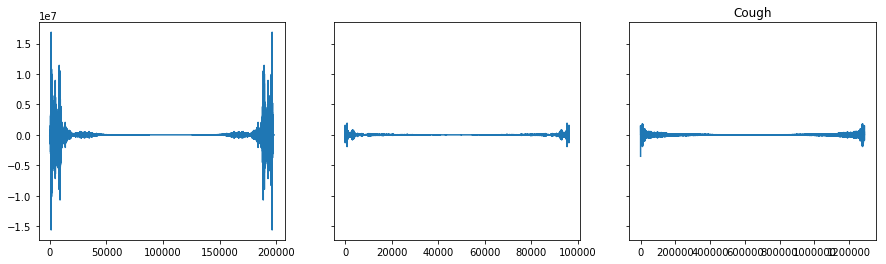

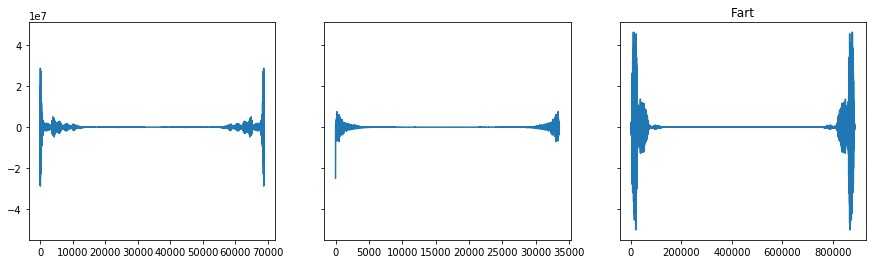

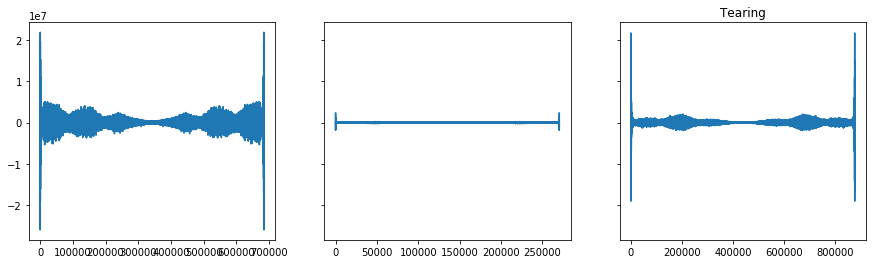

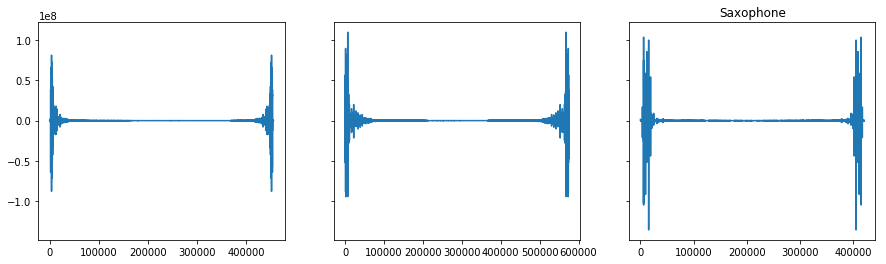

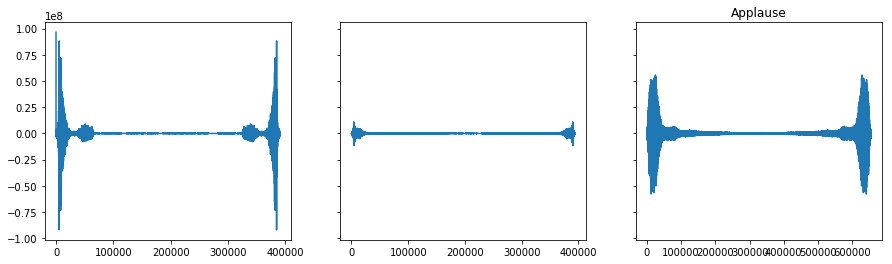

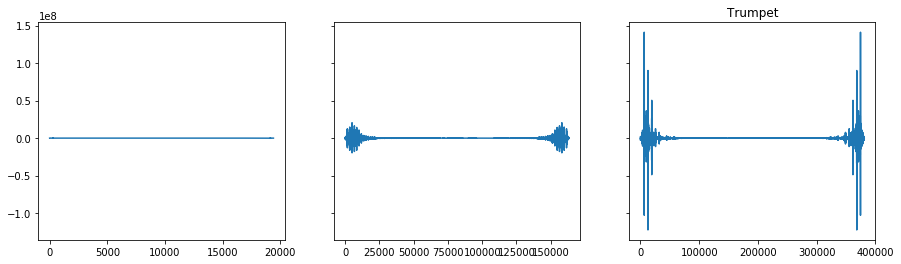

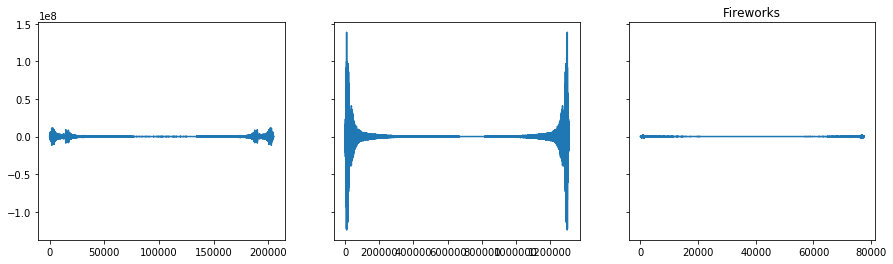

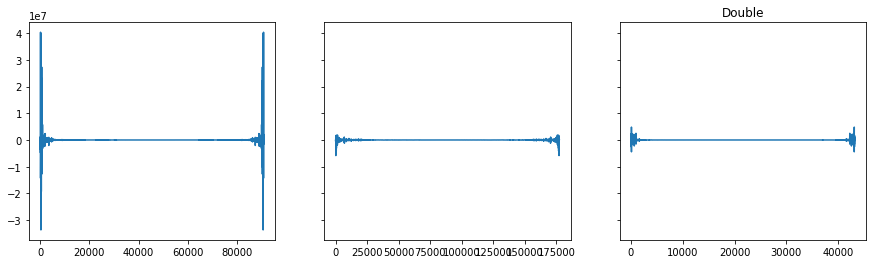

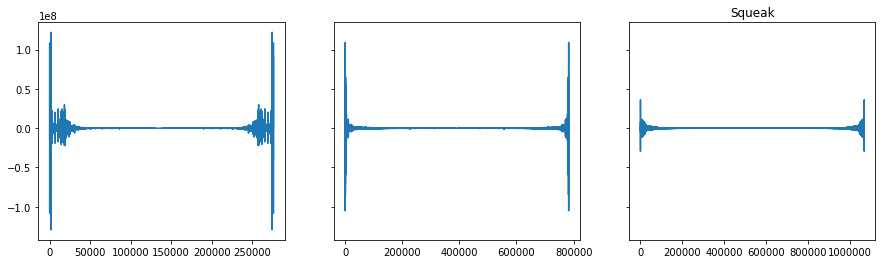

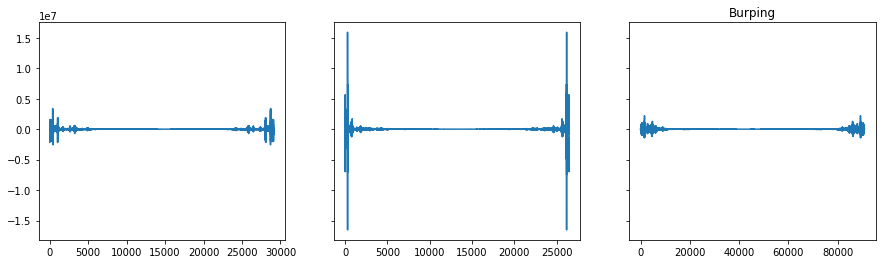

In [76]:
import numpy as np

def fft(data, fs):
    return np.fft.fft(data)

for cat_id in cat_ids:
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
    plot_cat_data(ax1, cat_id, './train/' + files_by_cat[cat_id][0], fn=fft)
    plot_cat_data(ax2, cat_id, './train/' + files_by_cat[cat_id][1], fn=fft)
    plot_cat_data(ax3, cat_id, './train/' + files_by_cat[cat_id][2], fn=fft)
    plt.title(cat_id)
    plt.show()



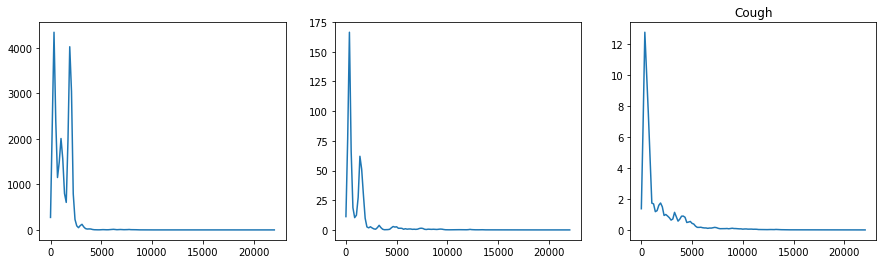

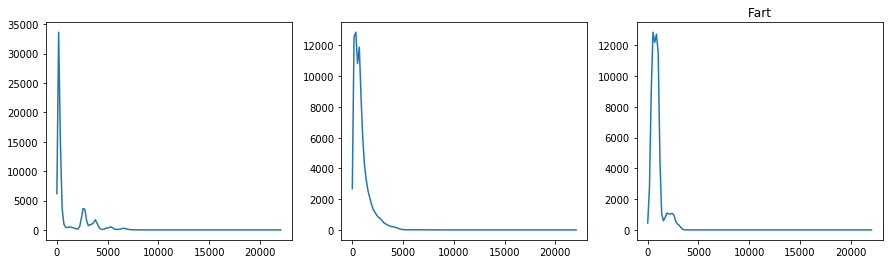

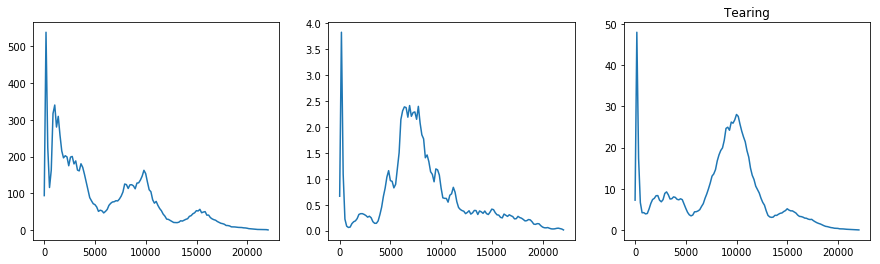

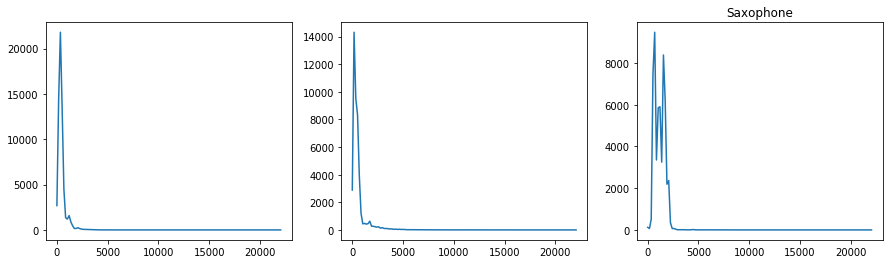

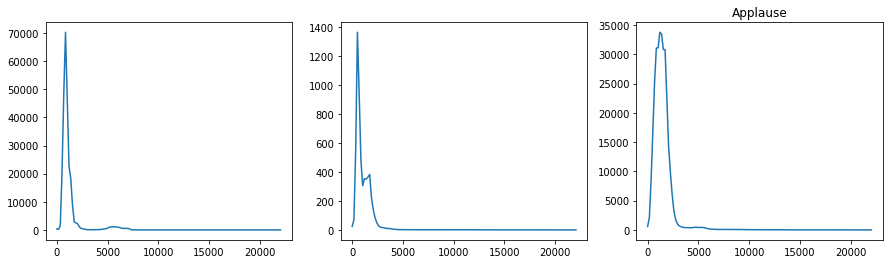

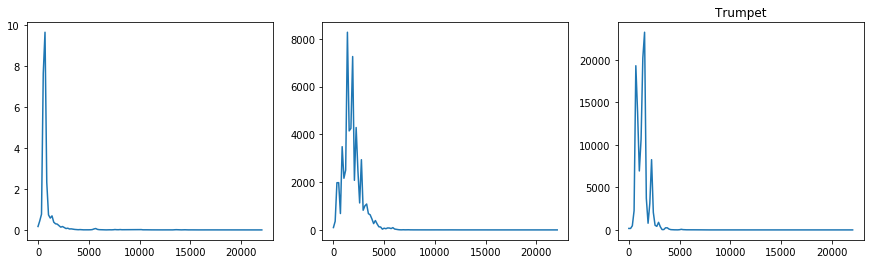

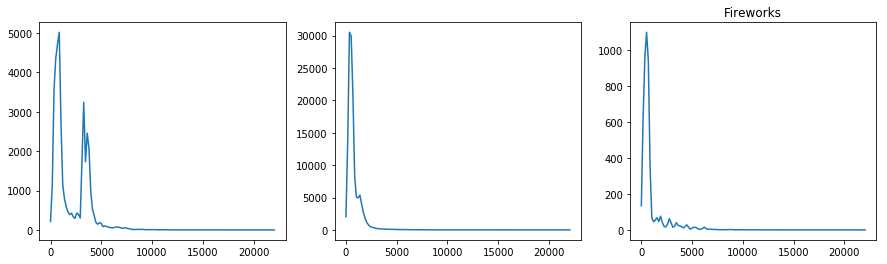

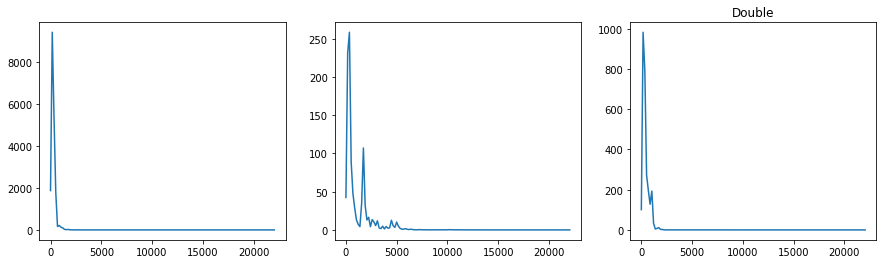

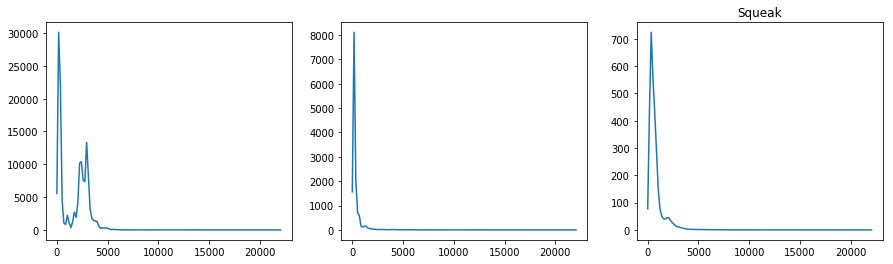

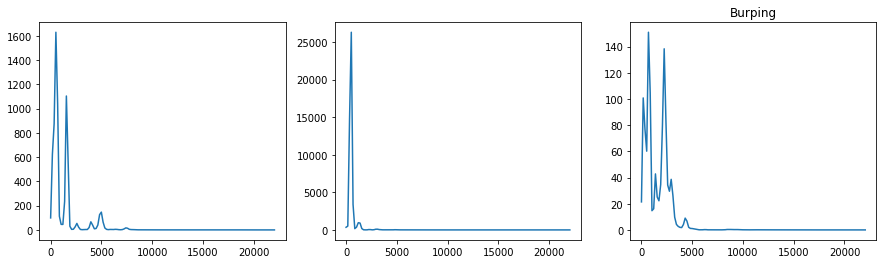

In [78]:
from scipy import signal


def plot_cat_data2(plt, cat_id, filename):
    fs, data = wavfile.read(filename)
    ferqs, psd = signal.welch(data, fs)
    plt.plot(ferqs, psd)



for cat_id in cat_ids:
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
    plot_cat_data2(ax1, cat_id, './train/' + files_by_cat[cat_id][0])
    plot_cat_data2(ax2, cat_id, './train/' + files_by_cat[cat_id][1])
    plot_cat_data2(ax3, cat_id, './train/' + files_by_cat[cat_id][2])
    plt.title(cat_id)
    plt.show()




In [79]:
print(len(cat_ids))

10
